In [4]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9 )
plt.style.use('ggplot')

In [5]:
# Importing the dataset
data = pd.read_csv('C:/Users/hp/Downloads/countries of the world.csv')
print(data.shape)
data.head()

(227, 20)


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


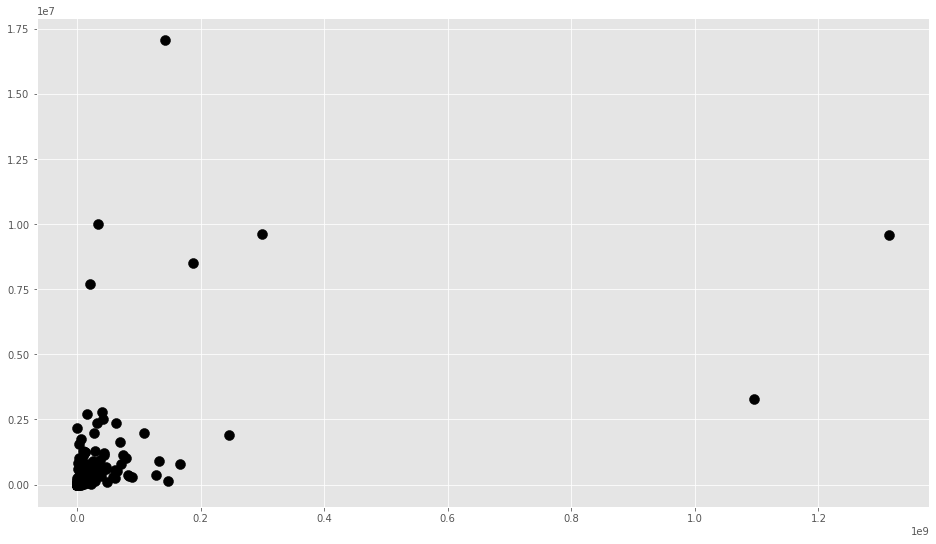

In [6]:
# Getting the values and plotting it
f1 = data['Population'].values
f2 = data['Area (sq. mi.)'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=100)

In [7]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [8]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[6.1403085e+08 1.2049243e+09]
 [5.5840102e+08 5.9467514e+08]
 [3.0412317e+08 5.6212518e+08]]


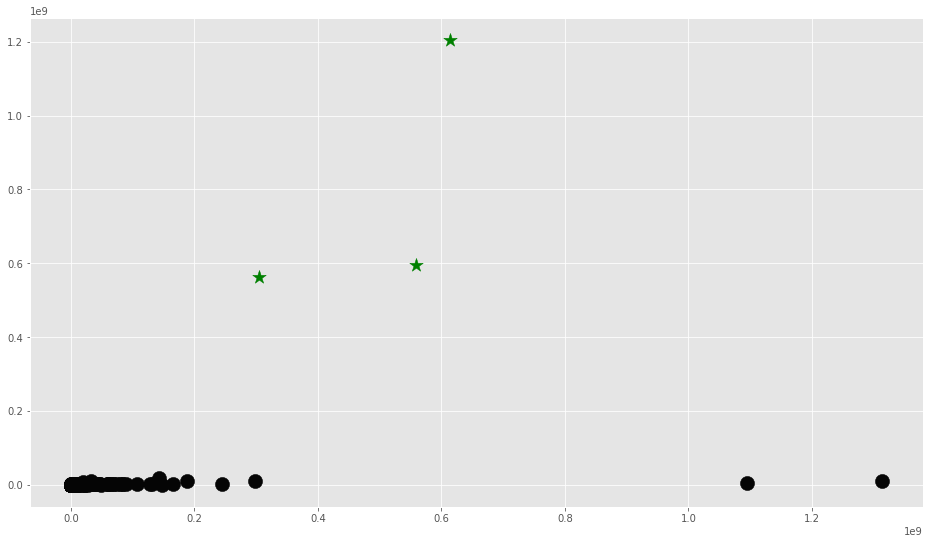

In [9]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=200)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

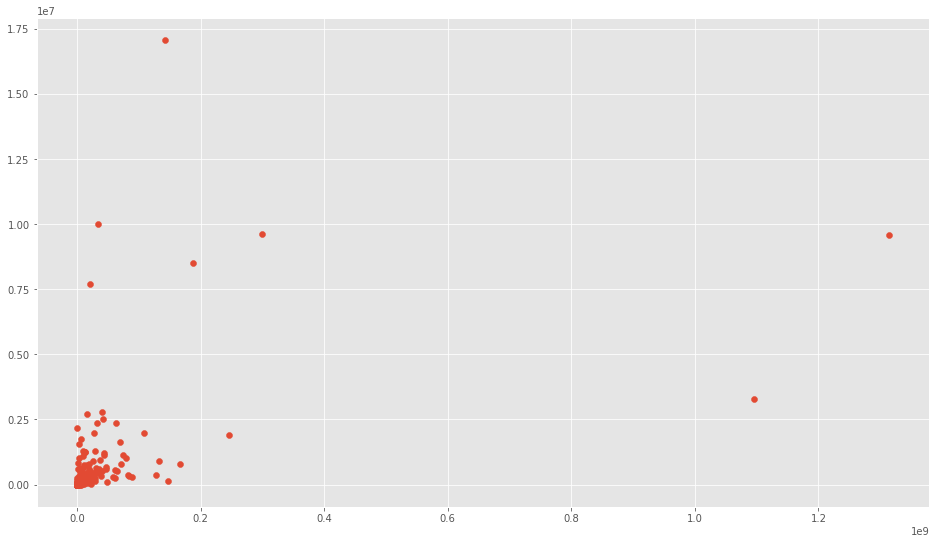

In [10]:
#scatter plot with x="Population" nad y='Area (sq. mi.)'
plt.scatter(data['Population'],data['Area (sq. mi.)'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
#normalizing the data using MinMax Normalization
scaler=MinMaxScaler()
scaler.fit(data[['Population']])
data["Population"]=scaler.transform(data[["Population"]])

scaler.fit(data[["Area (sq. mi.)"]])
data["Area (sq. mi.)"]=scaler.transform(data[["Area (sq. mi.)"]])

In [13]:
#applying K-Means algorithm
model=KMeans(n_clusters=3)

In [15]:
#both training/fitting and prediction
y_out=model.fit_predict(data[['Population','Area (sq. mi.)']])
y_out

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [16]:
#adding a column to specify the record to which cluster the record belong too.
data['cluster_using_MinMax']=y_out
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,cluster_using_MinMax
0,Afghanistan,ASIA (EX. NEAR EAST),0.023631,0.037920,"48,0","0,00","23,06","163,07",700.0,"36,0",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",0
1,Albania,EASTERN EUROPE,0.002720,0.001683,"124,6","1,26","-4,93","21,52",4500.0,"86,5",...,"21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",0
2,Algeria,NORTHERN AFRICA,0.025056,0.139485,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298",0
3,American Samoa,OCEANIA,0.000039,0.000012,"290,4","58,29","-20,71","9,27",8000.0,"97,0",...,10,15,75,2,"22,46","3,27",NaN,NaN,NaN,0
4,Andorra,WESTERN EUROPE,0.000049,0.000027,"152,1","0,00","6,6","4,05",19000.0,"100,0",...,"2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN,0


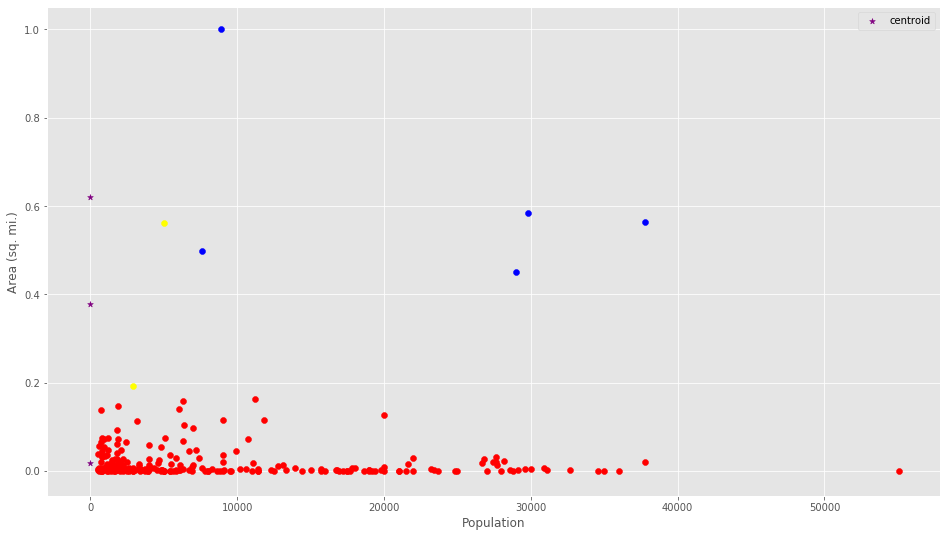

In [19]:
#seperating the clusters into df4,5,6 as we have decided to make only 3 clusters
data4=data[data.cluster_using_MinMax==0]
data5=data[data.cluster_using_MinMax==1]
data6=data[data.cluster_using_MinMax==2]
plt.scatter(data4['GDP ($ per capita)'],data4['Area (sq. mi.)'],color="red")
plt.scatter(data5['GDP ($ per capita)'],data5['Area (sq. mi.)'],color="blue")
plt.scatter(data6['GDP ($ per capita)'],data6['Area (sq. mi.)'],color="yellow")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Population")
plt.ylabel("Area (sq. mi.)")
plt.legend()